<a href="https://colab.research.google.com/github/alexdel1/HackGoogleAI/blob/main/TP_m1_apprentissage_automatiqueSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
np.set_printoptions(precision=3)

---

# TP -1 : Apprentissage sur des données rélles

**Prof. Delode**  
IUT Aurillac  
UCA  

---

**Compétences :**  
- R6.02  
- R6.05

---



## Introduction


Le but de ce laboratoire est de démontrer le *pipeline* d'apprentissage automatique. Nous couvrons une vue d'ensemble étape par étape d'une tâche typique d'apprentissage automatique, et à chaque étape nous décrivons les sous-tâches qui doivent être exécutées.


## La tâche et les données

Les données se trouvent dans le dossier ```data```. Ces données sont des lignes de mesures associées à la croissance des cellules dans les pins sylvestres suivis dans la commune de Walscheid en France. Chaque ligne correspond aux données d'une semaine. Les caractéristiques (que nous désignerons par les variables $X_1,X_2,X_3$) sont : le numéro de la semaine, la température moyenne mesurée et l'humidité du sol au cours de cette semaine. La dernière colonne (que nous désignerons par $Y$) est la cible (target) : le nombre de nouvelles cellules mesurées au cours de la semaine correspondante (le nombre est une moyenne des mesures effectuées sur plusieurs arbres). Soit $\mathbf{X} \in \mathbf{R}^{n \times 3}$ les instances (sur $n$ semaines) ; c'est-à-dire que chaque vecteur ligne $\mathbf{x}_i$ de $\mathbf{X} $ est une instance  correspondant à des valeurs de $X_1,X_2,X_3$, associées à l'étiquette $y_i$) ; et $\mathbf{y} = [y_1,\ldots,y_n]^\top$ sont les étiquettes (c'est un vecteur colonne).

Le comptage des cellules implique l'extraction manuelle de micro-carottes de l'arbre et le comptage des cellules au microscope. Il serait donc avantageux de construire un modèle informatique qui permettrait d'estimer automatiquement la croissance à partir de mesures environnementales telles que la température et les heures de lumière du jour (qui peuvent être obtenues facilement et automatiquement), c'est-à-dire un modèle piloté par les données. En outre, le modèle pourrait être analysé pour mieux comprendre les facteurs de croissance, et nous pourrions également construire un modèle de prévision.

## Implementation de la "pipeline"

Dans cette section, nous allons implementer une "pipeline" d'apprentissage pour charger et pré-processer les données. Nous allons donc construire et évaluer un modèle régressif. Chaque sections suivantes contient des tâches à terminer. Vérifier dans les cases le code à compléter.

## Analyser les données

Les données d'entrainement sont stockés dans les variables ```X``` et ```y```. Nous pouvons inspecter la distribution de chaque variable en utilisant la fonction ```hist```de ```Matplotlib```. Rappelez-vous qu'en Python la première caractéristique est indexé à ```0```quand nous utilisons $X_1$ en notation mathématique. Exécuter la cellule suivante et observer les résultats.

(array([ 4.,  3., 13., 12., 16., 10., 10., 14., 16.,  8.]),
 array([-3.35 , -0.896,  1.558,  4.012,  6.466,  8.92 , 11.374, 13.828,
        16.282, 18.736, 21.19 ]),
 <BarContainer object of 10 artists>)

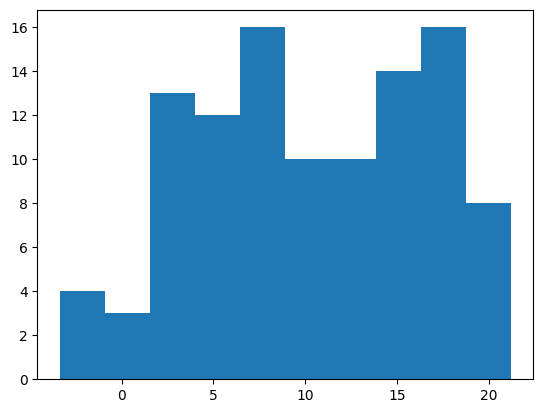

In [ ]:
# Charger les données à partir du fichier

data_train = np.loadtxt('data_train.csv', delimiter=',', dtype=np.dtype("float64"))

# Copier les données dans la matrice des variables et la colonne des cibles

X = data_train[:,0:-1]
y = data_train[:,-1]

# Regardons les données pour X_2

plt.figure()
plt.hist(X[:,1], 10)

In [ ]:
y.shape

(106,)

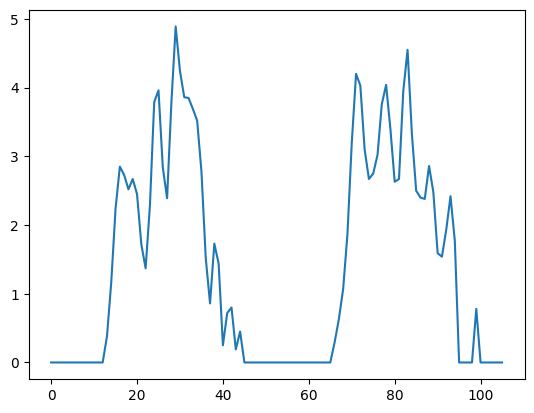

In [ ]:
plt.plot(y)

La cellule suivante montre la comparaison entre $x_3$ et $x_2$

Text(0, 0.5, '$x_3$')

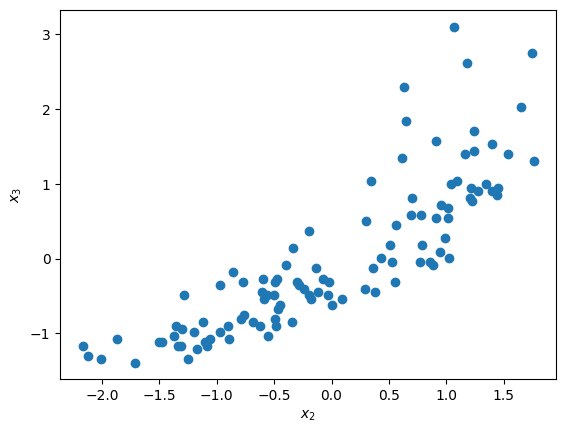

In [ ]:
plt.figure()
plt.plot(X[:,1],X[:,2], 'o')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')

La correlation entre $X_1$ (nombre de semaines) et la variable cible (nombre de cellules) devrait montrer que la croissance incrémente pendant la 12e semaine de l'année, arrive à son max pendant l'été, avant de baisser pendant l'automne.

> **Tâche 1:** Visualiser les histogrammes pour toutes les variables, après comparer $X_1$ (week number) avec y (nombre de cellules).

In [ ]:
#compléter ici avec votre code

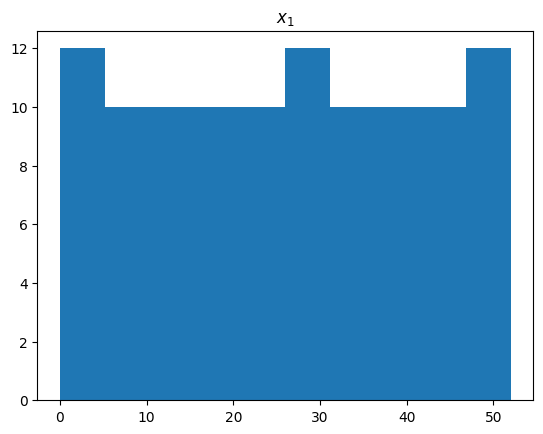

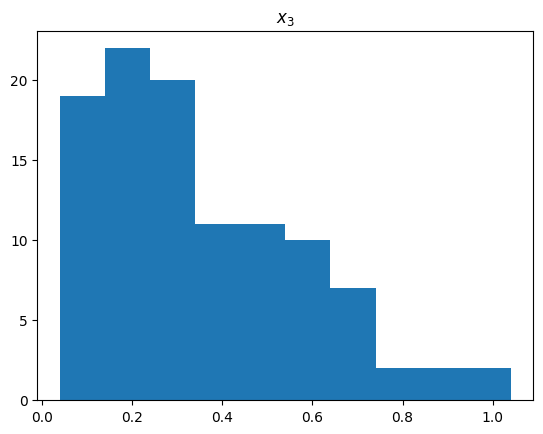

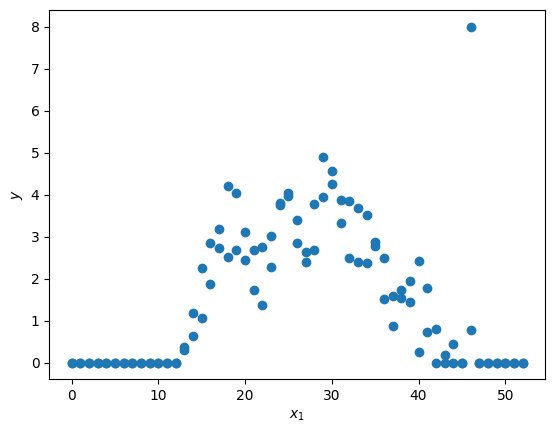

In [ ]:

plt.figure()
plt.hist(X[:,0], 10)
plt.title("$x_1$")

plt.figure()
plt.hist(X[:,2], 10)
plt.title("$x_3$")

plt.figure()
plt.plot(X[:,0],y, 'o')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

## Préparation des données / préprocessing

Cette étape est fondametale et peut prendre beaucoup de temps. Il faut nettoyer les données, prendre en compte les valeurs manquants, enlèver les "outliers", réduire les dimensions, sélectionner le caracteristiques...
Normalement l'analyse exploratoire nous guide pour cette étape. Par exemple, si vous avez visualisé correctement les données target, il semble qu'il y ait un "outlier" pour la colonne $y$, probablèment un $8$ enregistré à la place d'un $0$.

L'étape exploratoire nous a montré aussi que les caractéristiques n'ont pas la même échelle. Une technique habituelle est celle de les standardiser pour avoir moyenne $0$ et écart type $1$ pour donner le même poids à chaque variable.

> **Tâche 2:** Standardiser les variables ($X$).

Suggestion: NumPy a une fonction ```mean```. En appellant ```mean(X,axis=0)``` on obtient un vecteur de moyennes, une pour chaque colonne. ```axis=0``` signifie que la variable muette dans le sigma du mean est ```i``` pour les lignes donc on a un résultat pour chaque colonne.
 De façon similaire on peut utiliser ```std```.

Faites une fonction du type
```python
def foo(arg):
   ...
   return output
```
Rappel sur numpy : les opérations sur les tableaux sont faited point à point (Hadamard). Pour les opérations d'algèbre linéaide :
* X@Y : la multiplication matricielle
* np.linalg.inv(X) : l'inverse
* X.T : la transposée

Rappel : lors de la généralisation de votre modèle à des valeurs tests, n'oubliez pas de normaliser vos inputs de test aussi pour avoir des résultats comparables. On peut réfléchir à la différence des moyennes/variances entre les données totales de développement (train/valid/test) et les données opérationnelles (par exemple data/concept drift pour des live data ou data/distribution mismatch dans le cas général).

In [ ]:
# calculer moyenne et écart type et standardiser

m = #on devrait obtenir  array([26.   , 10.192,  0.349])
s =

In [ ]:
# calculer moyenne et écart type et standardiser
def standard(X):
    m = np.mean(X,axis=0)#on devrait obtenir  array([26.    10.192  0.349])
    s = np.std(X,axis=0)
    return (X-m)/s

In [ ]:
X_train= standard(X)
y_train=y

## Construire un modèle

Une approche typique pour les tâches de regression c'est la méthode des moindres carrées (*ordinary least squares* (OLS)). Par contre, OLS est un modèle linéaire, mais nous avons vu antérieurement que la caractéristique $X_1$ a une correlation non-linéaire avec la cible $Y$. Pour permettre à un modèle linéaire de capturer des correlations non linéaire, nous pouvons utiliser des fonctions à base polynomiale pour créer un nouveau espace de caractéristiques non linéaires pour continuer à utiliser le modèle linéaire. Nous avons implementé cette conversion avec la fonction ```phi```, où le deuxième paramètre indique le degré du polynome. Avec le degré $2$ nous produisons un espace de caractéristiques comme suit:

$$
    \mathbf{z} = \phi(\mathbf{x}) = [1,x_1,x_2,x_3,x^2_1,x^2_2,x^2_3]
$$

pour une instance $\mathbf{x}$. Avec degré $1$, on revient à l'espace des caractéristiques initial,

$$
    \mathbf{z} = \phi(\mathbf{x}) = [1,x_1,x_2,x_3]
$$

avec l'addition d'une colonne de $1$s pour représenter le intercept/biais.

Notre modèle doit s'ajouster aux données en utilisant les paramètres :

$$
    \mathbf{\hat\beta} = [\beta_0,\beta_1,\ldots,\beta_m]^\top
$$

où $m$ est la taille du vecteur $\mathbf{z}$. Et $\mathbf{\hat\beta}$ sont les valeurs qui minimisent l'erreur; donné en Eq. (2) (utilisé aussi pour l'évaluation). Avec le $\mathbf{\hat\beta}$, nous pouvons donc calculer notre prediction pour chaque point du jeu de donnée de test:

$$
    \hat{y} = \mathbf{z\hat\beta}
$$

> **Ques 1**: Dériver $\mathbf{\hat\beta}$, en minimisant Eq. (2); c.a.d. mettre la dérivée à $0$ and résoudre pour $\mathbf{\hat\beta}$. Mettre l'Eq. (2) sous forme d'une équation matricielle facilitera le calcul.

Vous devriez avoir obtenu

\begin{equation}
    \mathbf{\hat\beta} = (\mathbf{z}^\top\mathbf{z})^{-1}\mathbf{z}^\top\mathbf{y} \hspace{1.5cm} (1)
\end{equation}
(or equivalent).

> **Tâche 3**: Implementer la méthode pour obtenir le vecteur de coefficients.

In [ ]:
# Création des caractéristiques

def phi(X, degree):
    N,D = X.shape
    for d in range(2,degree+1):
        X = np.column_stack([X,X[:,0:D]**d])
    X = np.column_stack([np.ones(len(X)), X])
    return X

degree = 2

Z = phi(X,degree)

#écrire votre solution ici

w = ...

In [ ]:
m = np.mean(y,axis=0)#on devrait obtenir  array([26.    10.192  0.349])
s = np.std(y,axis=0)
(m,s)

(1.5068867924528302, 1.6375559118828713)

In [ ]:
# Création des caractéristiques

def phi(X, degree):
    N,D = X.shape
    for d in range(2,degree+1):
        X = np.column_stack([X,X[:,0:D]**d])
    X = np.column_stack([np.ones(len(X)), X])
    return X

degree = 2

z = phi(X_train,degree)

#écrire votre solution ici

w = np.linalg.inv(z.T@z)@z.T@y
w

array([ 1.708,  0.187,  0.887, -0.054, -0.528,  0.23 ,  0.097])

> **Ques 2**: Quel problème on pourrait rencontrer pour construire ce modèle ?

## Evaluation et sélection du meilleur modèle

Pour évaluer un modèle nous avons mis de côté des données de ***validation***. C'est important de standardiser les données de validation/test de la même façon que les données d'entraînement.

> **Tâche 4**: Charger et pré-processer (```data_valid.csv```). Utiliser des noms différents pour les variables (for example, ```X_valid``` and ```y_valid```)


In [ ]:
#solution pour la tâche 4

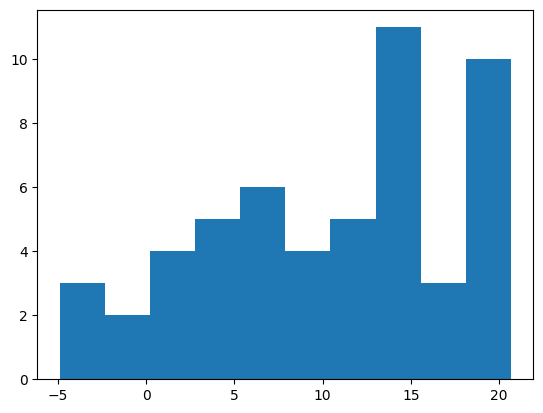

In [ ]:
# Charger les données à partir du fichier

data_valid = np.loadtxt('data_valid.csv', delimiter=',', dtype=np.dtype("float64"))

# Copier les données dans la matrice des variables et la colonne des cibles

X_valid = data_valid[:,0:-1]
y_valid = data_valid[:,-1]

# Regardons les données pour X_2

plt.figure()
plt.hist(X_valid[:,1], 10)
X_valid=standard(X_valid)

Nous allons maintenant évaluer la qualité de nos prédictions. La mesure choisie est (erreur quadratique moyen) *mean squared error* calculé sur $N$ instances:
\begin{equation}
    \textsf{MSE}(\mathbf{\hat\beta}) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2  \hspace{1.5cm} (2)
\end{equation}

> **Tâche 5**: Implementer MSE, c.a.d., une fonction ```mse = MSE(y_valid,y_pred)```. Afficher la valeur obtenue pour le modèle

In [ ]:
y.shape

(106,)

In [ ]:
z.shape

(106, 7)

In [ ]:
#completer ici:

In [ ]:

def MSE(y_true, y_pred):
    N = len(y_true)
    return (1/N) * np.sum((y_true - y_pred)**2)

# Pour utiliser la fonction:
z_valid = phi(X_valid, degree)  # Transformer les données de validation
y_valid_pred = z_valid @ w  # Faire les prédictions
mse_valid = MSE(y_valid, y_valid_pred)  # Calculer le MSE

In [ ]:
mse_valid

0.8514079028351648

> **Tâche 6**: Calculer MSE où toutes les prédictions sont la moyenne de $Y$ dans les données d'entraînement.

In [ ]:
#écrire la solution ici

In [ ]:


# Pour utiliser la fonction:
z_train = phi(X_train, degree)  # Transformer les données de validation
y_train_pred = z_train @ w  # Faire les prédictions
mse_train = MSE(y_train, y_train_pred)  # Calculer le MSE

In [ ]:
mse_train

0.9644718104959984

Vous devrier obtenir des résultats comme ci-dessous (nous avons utilisé la variable $w$ pour $\mathbf{\hat\beta}$).

        w =  [ 1.708,  0.187,  0.887, -0.054, -0.528,  0.23 ,  0.097]
        MSE on validation data   0.9037430481422446 ou 0.8514079028351647
        MSE baseline             2.1857265307938776 ou 0.9644718104959984
          
> **Tâche 7**: Comment MSE change-t-il si on remplace l'outlier par une autre valeur (e.g., $0$)? Vous pouvez faire un changement *inplace* et mettre des conditions à la place des indices (comme en R)

In [ ]:
#solution pour la tâche 7

# Score

print("MSE on validation data after outlier removed", MSE(y_valid,y_pred))

In [ ]:
y_train[y_train>6]=0

In [ ]:


# Pour utiliser la fonction:
z_train = phi(X_train, degree)  # Transformer les données de validation
y_train_pred = z_train @ w  # Faire les prédictions
mse_train = MSE(y_train, y_train_pred)  # Calculer le MSE


# Pour utiliser la fonction:
z_valid = phi(X_valid, degree)  # Transformer les données de validation
y_valid_pred = z_valid @ w  # Faire les prédictions
mse_valid = MSE(y_valid, y_valid_pred)  # Calculer le MSE
(mse_train,mse_valid)

(0.45277403807234956, 0.8514079028351648)

> **Ques 3**: Expliquer l'importance des outliers par rapport à l' Eq (2)

C'est important d'utiliser un *validation set* pour l'évaluation pour éviter l' **overfitting** (surapprentissage). Nous pouvons vérifier l'existence d'overfitting en comparant les résultats sur les jeux de données d'entrainement et de validation. Nous allons maintenant tester plusieurs modèles en variant le degré du polynome.

> **Tâche 8** : Calculer MSE avec le degré du polynome entre 1 et 9 (**attention**: avec l'outlier corrigé). Ajouter les MSE pour l'ensemble de validation et celui d'entrainement aux deux vecteurs donnés (pour les dessiner)




In [ ]:
valid_res=[]
train_res=[]

... #compléter ici

plt.figure()
plt.plot(range(1,10), valid_res, '-')
plt.plot(range(1,10), train_res, '-')
plt.xlabel('$degree of polynomial$')
plt.ylabel('$MSE$')
plt.legend(['validation MSE', 'training MSE'])

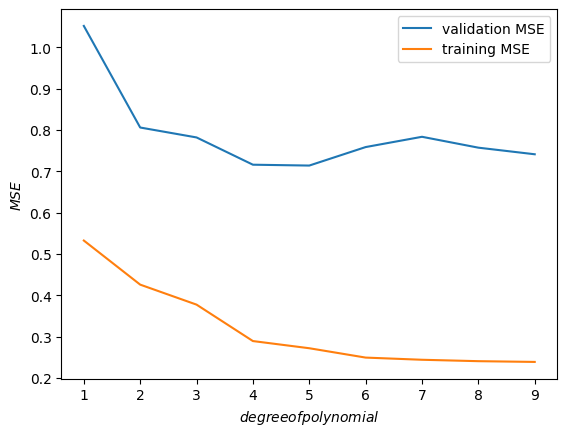

In [ ]:

valid_res=[]
train_res=[]

for degree in range(1,10):
    z_train=phi(X_train, degree)
    w = np.linalg.inv(z_train.T@z_train)@z_train.T@y
    y_train_pred = z_train @ w  # Faire les prédictions
    mse_train = MSE(y_train, y_train_pred)
    train_res+=[mse_train]
    z_valid=phi(X_valid, degree)
    y_valid_pred = z_valid @ w  # Faire les prédictions
    mse_valid = MSE(y_valid, y_valid_pred)
    valid_res += [mse_valid]



plt.figure()
plt.plot(range(1,10), valid_res, '-')
plt.plot(range(1,10), train_res, '-')
plt.xlabel('$degree of polynomial$')
plt.ylabel('$MSE$')
plt.legend(['validation MSE', 'training MSE'])

> **Ques 4**: Selon ces résultats quel degré on devrait utiliser pour le polynome? Si vous hésitez entre deux, appliquez un principe de parcimonie (rasoir d'Ockham).

La validation utilise une partie des données d'entraînement "mise de côté" pour mettre au point les **hyperparamètres**. Ici notre hyperparamètre n'est que le degré du polynome. Nous allons maintenant tester ces modèles sur un **test set**. L'idée c'est que ce jeu de données représente des données jamais vu antérieurement (par exemple on peut imaginer qu'on utilise toutes les données jusqu'à 2022 pour construire un modèle que nous allons tester sur les données pas encore vue de l'année prochaine).

> **Tâche 9** : Evaluer le modèle sur le **test** set ```data_test.csv``` avec le paramètre choisi pendant l'étape de validation. Il faudra re-entraîner le modèle sur les données train et validation fusionnées ensemble (on utilise les données de validation comme partie de l'entraînement parce que c'est toujours mieux d'utiliser toutes les données à disposition).


La standardisation doit s'appliquer sur les données concaténées. La standardisation pour les données de test doit s'appliquer avec les valeurs utilisés pour l'entrainement.

Pour fusionner des données, on pourra utiliser *np.hstack* ou *np.vstack* selon la direction voulue.

Attention, pour numpy, un array de dimension (n) n'est pas la même chose qu'un array de dimension (n,1). La méthode la plus simple est d'utiliser la méthode *X.reshape(n,1)*.

Comme vous manipulez des données temporelles, tracez les différents *y* (train/test et obs/pred) pour vous aider à vérifier vos résultats.

In [ ]:
?np.hstack

In [ ]:
y_train.shape

(106,)

In [ ]:

# Charger les données à partir du fichier

data_train= np.loadtxt('data_train.csv', delimiter=',', dtype=np.dtype("float64"))

# Copier les données dans la matrice des variables et la colonne des cibles

X_train = data_train[:,0:-1]
y_train = data_train[:,-1]


# Charger les données à partir du fichier

data_valid = np.loadtxt('data_valid.csv', delimiter=',', dtype=np.dtype("float64"))

# Copier les données dans la matrice des variables et la colonne des cibles

X_valid = data_valid[:,0:-1]
y_valid = data_valid[:,-1]

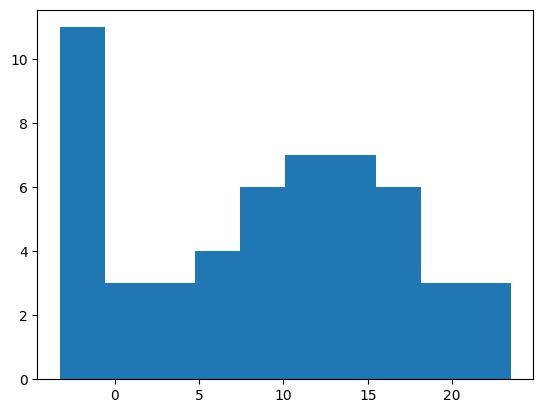

In [138]:

# Charger les données à partir du fichier

data_test = np.loadtxt('data_test.csv', delimiter=',', dtype=np.dtype("float64"))

# Copier les données dans la matrice des variables et la colonne des cibles

X_test = data_test[:,0:-1]
y_test = data_test[:,-1]

# Regardons les données pour X_2

plt.figure()
plt.hist(X_test[:,1], 10)
X_test=standard(X_test)

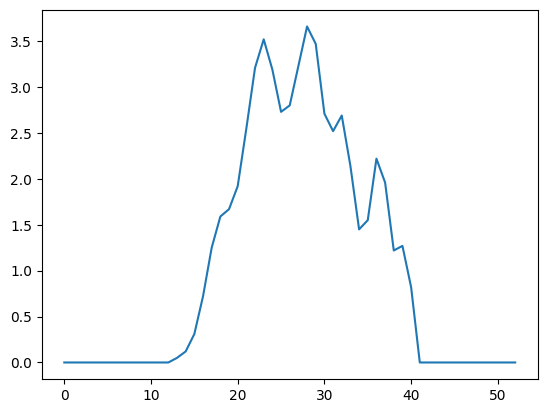

In [ ]:
plt.plot(y_test)

In [ ]:
X_tot=np.vstack((X_train,X_valid))
y_tot=np.vstack((y_train.reshape(len(y_train),1),y_valid.reshape(len(y_valid),1)))

In [ ]:
y_tot[y_tot>6]=0

In [ ]:

# D'abord calculer les statistiques sur les données d'entraînement uniquement
tot_mean = np.mean(X, axis=0)
tot_std = np.std(X, axis=0)

def standard(X, mean=tot_mean, std=tot_std):
    return (X - mean) / std

# Appliquer aux différents ensembles
X_tot = standard(X_tot)
X_valid = standard(X_valid, tot_mean, tot_std)
X_test = standard(X_test, tot_mean, tot_std)

In [ ]:
degree=2

z_tot=phi(X_tot, degree)
w_tot = np.linalg.inv(z_tot.T@z_tot)@z_tot.T@y_tot
y_tot_pred = z_tot @ w_tot  # Faire les prédictions
mse_tot = MSE(y_tot, y_tot_pred)

In [ ]:
y_tot.shape,y_tot_pred.shape

((159,), (159,))

In [ ]:
w_tot

array([ 1.401e+00, -8.741e-02,  1.371e-01,  1.119e+00,  9.229e-04,
       -1.987e-04, -1.071e-01])

In [ ]:


z_test=phi(X_test, degree)
y_test_pred = z_test @ w_tot  # Faire les prédictions
mse_test = MSE(y_test.reshape(53,1), y_test_pred)

In [ ]:
(mse_tot,mse_test)

(0.9645413308760968, 0.8610245870671841)

In [ ]:

print("Shape de y_train:", y_train.shape)
print("Shape de y_train_pred:", y_train_pred.shape)
print("Quelques prédictions:", y_train_pred[:5])
print("Vraies valeurs correspondantes:", y_train[:5])

Shape de y_train: (106,)
Shape de y_train_pred: (106,)
Quelques prédictions: [-0.143  0.185  0.136 -0.004 -0.024]
Vraies valeurs correspondantes: [0. 0. 0. 0. 0.]


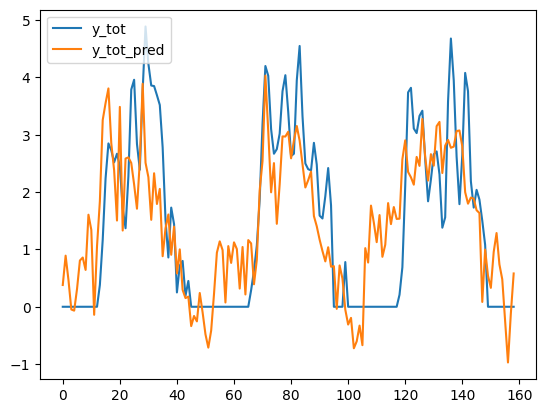

In [ ]:
plt.plot(y_tot,label="y_tot")
plt.plot(y_tot_pred,label="y_tot_pred")
plt.legend(loc="upper left")
plt.show()

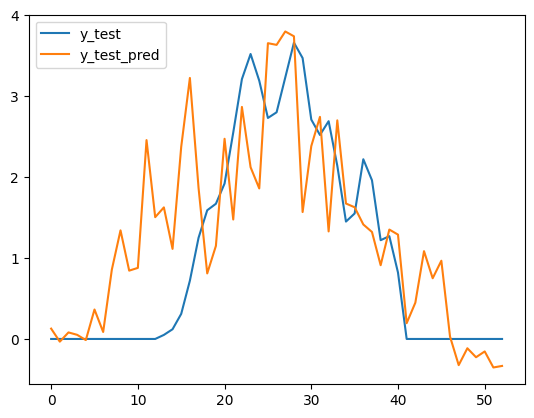

In [ ]:

plt.plot(y_test,label="y_test")
plt.plot(y_test_pred,label="y_test_pred")
plt.legend(loc="upper left")
plt.show()

MSE tot: 0.8067
MSE test: 0.9266


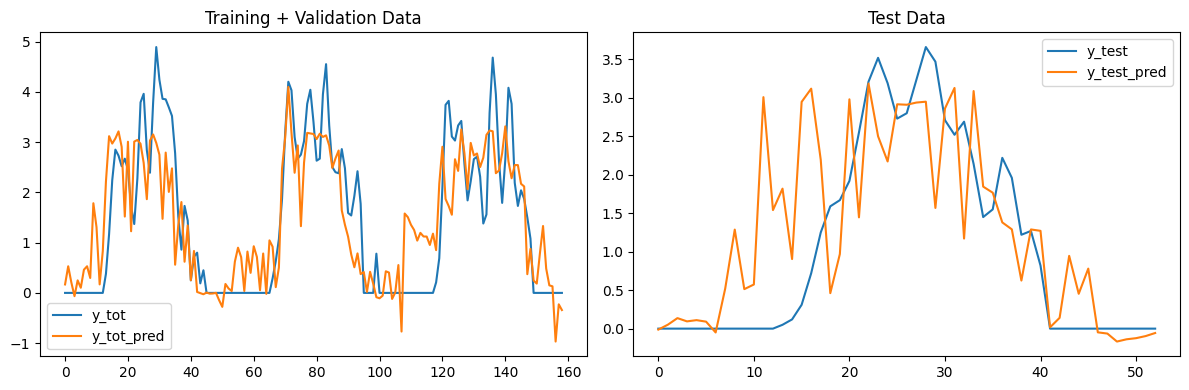

In [ ]:

# Fonctions de base
def standard(X, mean=None, std=None):
    """Standardize features"""
    if mean is None:
        mean = np.mean(X, axis=0)
    if std is None:
        std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

def phi(X, degree):
    """Create polynomial features"""
    N, D = X.shape
    for d in range(2, degree+1):
        X = np.column_stack([X, X[:,0:D]**d])
    X = np.column_stack([np.ones(len(X)), X])
    return X

def MSE(y_true, y_pred):
    """Calculate Mean Squared Error"""
    if len(y_true.shape) > 1:
        y_true = y_true.ravel()
    if len(y_pred.shape) > 1:
        y_pred = y_pred.ravel()
    return np.mean((y_true - y_pred) ** 2)

# Concaténation des données train et valid
X_tot = np.vstack((X_train, X_valid))
y_tot = np.concatenate((y_train, y_valid))
y_tot[y_tot>6]=0
# Standardisation des features
X_tot_std, mean_tot, std_tot = standard(X_tot)

# Standardisation des données de test avec les mêmes paramètres
X_test_std = (X_test - mean_tot) / std_tot

# Création des features polynomiales et fit
degree = 4
z_tot = phi(X_tot_std, degree)
w_tot = np.linalg.inv(z_tot.T @ z_tot) @ z_tot.T @ y_tot

# Prédictions
y_tot_pred = z_tot @ w_tot
z_test = phi(X_test_std, degree)
y_test_pred = z_test @ w_tot

# Calcul des MSE
mse_tot = MSE(y_tot, y_tot_pred)
mse_test = MSE(y_test, y_test_pred)
print(f"MSE tot: {mse_tot:.4f}")
print(f"MSE test: {mse_test:.4f}")

# Visualisation des résultats
plt.figure(figsize=(12, 4))

# Plot des données totales
plt.subplot(1, 2, 1)
plt.plot(y_tot, label='y_tot')
plt.plot(y_tot_pred, label='y_tot_pred')
plt.legend()
plt.title('Training + Validation Data')

# Plot des données de test
plt.subplot(1, 2, 2)
plt.plot(y_test, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()
plt.title('Test Data')

plt.tight_layout()
plt.show()

In [ ]:
#solution de la tâche 9


# Score

print("MSE on test data  ", MSE(y_test,y_pred))

> **Ques 5**: Comparer le MSE obtenu avec le résultat du validation set?

> **Tâche 10** : Effectuer à nouveau l'évaluation de la tâche 8 sur les données de test. Est-ce que cela confirme le choix pour l'hyperparamètre?

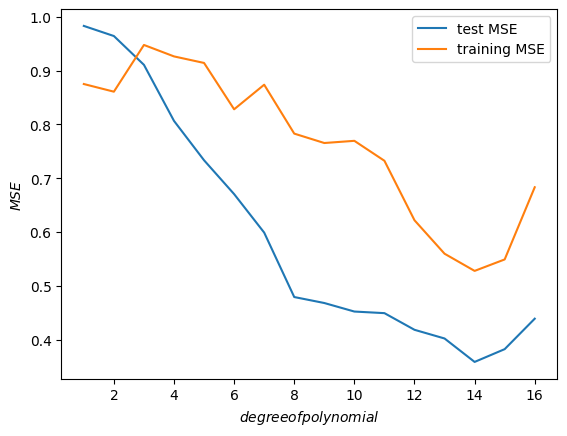

In [149]:


tot_res=[]
test_res=[]
n=17
for degree in range(1,n):
    # Création des features polynomiales et fit

    z_tot = phi(X_tot_std, degree)
    w_tot = np.linalg.inv(z_tot.T @ z_tot) @ z_tot.T @ y_tot

    # Prédictions
    y_tot_pred = z_tot @ w_tot
    z_test = phi(X_test_std, degree)
    y_test_pred = z_test @ w_tot

    # Calcul des MSE
    mse_tot = MSE(y_tot, y_tot_pred)
    mse_test = MSE(y_test, y_test_pred)
    tot_res+=[mse_tot]
    test_res += [mse_test]



plt.figure()
plt.plot(range(1,n), tot_res, '-')
plt.plot(range(1,n), test_res, '-')
plt.xlabel('$degree of polynomial$')
plt.ylabel('$MSE$')
plt.legend(['test MSE', 'training MSE'])

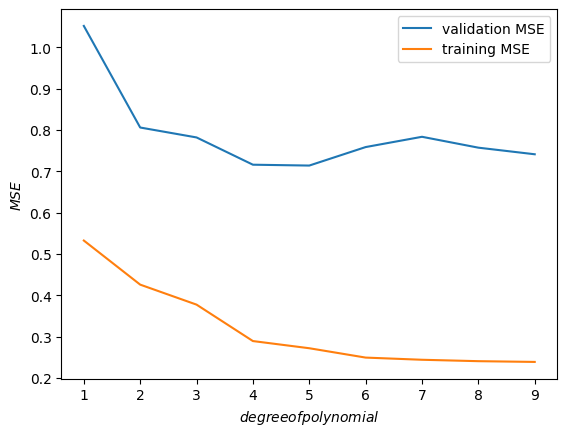

MSE baseline tot: 2.2618
MSE baseline test: 1.7285

MSE modèle tot: 0.4388
MSE modèle test: 0.6833

Amélioration sur données totales: 80.6%
Amélioration sur données test: 60.5%


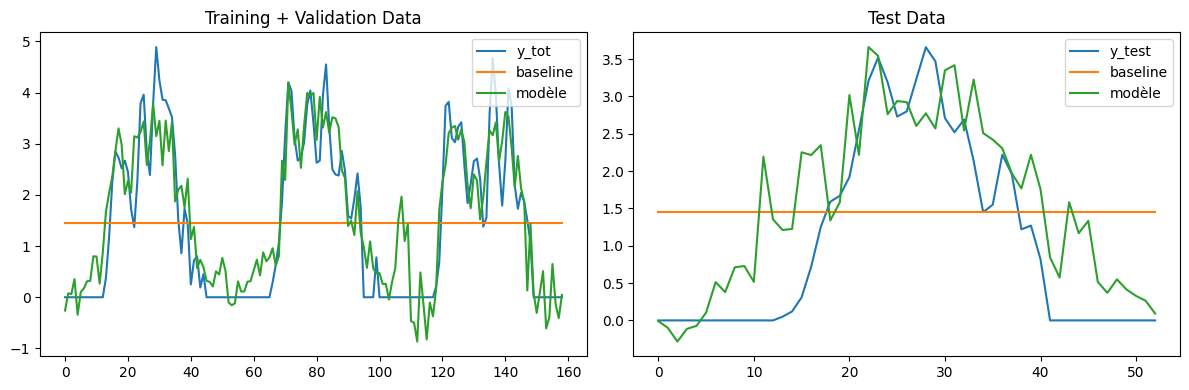

In [150]:

# Calculer la moyenne des données d'entraînement
y_mean = np.mean(y_tot)

# Prédire la moyenne pour chaque point
y_baseline_tot = np.full_like(y_tot, y_mean)
y_baseline_test = np.full_like(y_test, y_mean)

# Calculer les MSE pour la baseline
mse_baseline_tot = MSE(y_tot, y_baseline_tot)
mse_baseline_test = MSE(y_test, y_baseline_test)

print(f"MSE baseline tot: {mse_baseline_tot:.4f}")
print(f"MSE baseline test: {mse_baseline_test:.4f}")

# Comparer avec notre modèle
print(f"\nMSE modèle tot: {mse_tot:.4f}")
print(f"MSE modèle test: {mse_test:.4f}")

# Amélioration en pourcentage
improvement_tot = ((mse_baseline_tot - mse_tot) / mse_baseline_tot) * 100
improvement_test = ((mse_baseline_test - mse_test) / mse_baseline_test) * 100

print(f"\nAmélioration sur données totales: {improvement_tot:.1f}%")
print(f"Amélioration sur données test: {improvement_test:.1f}%")

# Visualisation
plt.figure(figsize=(12, 4))

# Plot des données totales
plt.subplot(1, 2, 1)
plt.plot(y_tot, label='y_tot')
plt.plot(y_baseline_tot, label='baseline')
plt.plot(y_tot_pred, label='modèle')
plt.legend()
plt.title('Training + Validation Data')

# Plot des données de test
plt.subplot(1, 2, 2)
plt.plot(y_test, label='y_test')
plt.plot(y_baseline_test, label='baseline')
plt.plot(y_test_pred, label='modèle')
plt.legend()
plt.title('Test Data')

plt.tight_layout()
plt.show()

In [ ]:
#insert here your solution for task 10



# Classification supervisée

Nous allons mener une tâche de classification supervisée *binaire*, c'est à dire avec deux classes de sortie. Le jeux de données représente deux notes pour deux matières indicatives et la classe correspond au fait que l'étudiant soit été admis ou pas à la fin de l'année.

Nous voulons un modèle qui donne la probabilité qu'un étudiant soit admis en fonction des deux notes de deux cours.  Nous commençons par charger et inspecter les données.

In [ ]:
# Load the dataset
data = np.loadtxt('./data/data.csv', delimiter=',')

#Add intercept term
data_1 = np.ones((data.shape[0], 4))
data_1[:, 1:] = data

X = data_1[:, 0:3]
y = data_1[:, -1]
y = y.reshape(-1, 1)


# Plot data
pos = np.where(y == 1) # instances of class 1
neg = np.where(y == 0) # instances of class 0
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()


N = X.shape[0]

## K-Nearest Neighbours

La méthode $k$-NN est une méthode **lazy** *non paramétrique*, qui n'a pas de "modèle" en tant que tel. Elle prédit avec
$$
P(Y=1|\mathbf{x}) \approx \frac{1}{k} \sum_{\mathbf{x}_i \in \textsf{Ne}_k(\mathbf{x})} y_i
$$
où $\textsf{Ne}_k(\mathbf{x})$ est le *voisinage* des $k$ exemples d'apprentissage les plus proches de $\mathbf{x}$ (généralement mesuré par la distance euclidienne).

**Ques 6** : Quel est l'effet des différentes valeurs de $k$ ? Conseil : dessinez sur papier et/ou testez empiriquement différentes valeurs.

**Ques 7** : Quelle est la complexité d'une prédiction avec une implémentation naïve de $k$-NN ? Quand est-ce que cela peut être un problème dans la pratique ?

**Tâche 11** : Implémentez cette fonction pour créer un classificateur $k$-NN et évaluez-le sur les données fournies. Indice : il n'y a pas vraiment d'étape d'entraînement ici ; il suffit de stocker les instances d'entraînement pour les rechercher plus tard.

In [ ]:
from numpy.linalg import norm

def kNN(k, X, y, x):
    '''
    kNN classification of x
    -----------------------
        Input:
        k: number of nearest neighbors
        X: training data
        y: class labels of training data
        x: test instance

        return the label to be associated with x

        Hint: you may use the function 'norm'
    '''
    # solution pour la tâche 11

In [ ]:
# Test kNN pour des différents k
Kmax=20
knn_accuracy = np.zeros(Kmax)
for k in range(1, Kmax+1):
    y_pred = np.zeros(len(y_test))


    for i in range(len(y_pred)):
        y_pred[i] = kNN(k, X_train, y, X_test[i,:])




    knn_accuracy[k-1] = 1-np.mean(np.abs(y_pred.reshape(-1,1)-y_test))


plt.plot(np.arange(1,Kmax+1), knn_accuracy)
plt.show()

## Régression logistique et descente au gradient


Dans la régression linéaire:

$$y = \theta_0 + \theta_1 x_1 + \cdots + \theta_d x_d$$
    
où $y \in \mathbf{R}$.

<div class="alert alert-block alert-info">
Note: Nous allons maintenant utiliser $\mathbf{\theta}$ au lieu de $\mathbf{\beta}$ </div>

Dans la classification, nous voulons une *indication* de la probabilité d'une instance d'appartenir à une certaine classe, une probabilité $P(y|\mathbf{x}) \in [0,1]$.  

Donné une fonction $z$ nous pouvons utiliser la **fonction logistique** ou **sigmoïde** pour faire que les valeurs de sortie soient toujours $\sigma(z) \in [0,1]$:

\begin{equation}
\sigma(z) = \frac{1}{1+\exp(-z)} \hspace{1.5cm}(1)
\end{equation}

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Par conséquent, nous pouvons traiter cela en tant que probabilité:

\begin{align*}
P(y=1|\mathbf{x}) &= \sigma(\mathbf{\theta}^\top\mathbf{x}) \\
P(y=0|\mathbf{x}) &= 1 - \sigma(\mathbf{\theta}^\top\mathbf{x})
\end{align*}

(on oublie le biais et on suppose $\mathbf{\theta}$ et $\mathbf{x}$ vecteurs colonne)

> **Tâche 12**: implémenter la fonction sigmoïde (1). A noter que la fonction en Python a la tendance a faire des Overflow donc c'est bien d'utiliser <a href="https://numpy.org/doc/stable/reference/generated/numpy.clip.html">clip</a> pour limiter l'entrée $z$ dans un interval $[-10 ,10]$.

In [ ]:
def sigmoid(z):
    # insert here the code for Task 1


Pour determiner les paramètres de la regression logistique, nous utilisons l'estimateur du maximum de vraisemblance (**maximum likelihood estimation** (MLE)). Pour cela nous avons besoin de deux étapes:

1. écrire la fonction de vraisemblance (likelihood)
2. trouver les valeurs de $\theta$ qui maximisent la fonction de vraisemblance logarithmique (log-likelihood).

Posons $X=[x_1^T; \dots ; x_n^T]$ la matrice qui contient les instances $x_i^T \in \mathbb{R}^{1\times d}$ sur les lignes et un vecteur colonne avec les paramètres du modèle $\theta \in \mathbb{R}^{d\times 1}.$

Les étiquettes sont binaires donc nous pouvons les modéliser avec une distribution de Bernoulli: $Y \sim Ber(p)$ where $p = \sigma(\mathbf{\theta}^\top\mathbf{x})$.

Donc la probabilité d'une instance $\mathbf{x}$ d'appartenir à une classe $y$ est:
$$
P\left(Y=y|X=\mathbf{x}\right) = \sigma(\mathbf{\theta}^\top\mathbf{x})^y \cdot \left[1-\sigma(\mathbf{\theta}^\top\mathbf{x})\right]^{(1-y)}
$$

Nous pouvons maintenant calculer la **likelihood** du dataset entier:

\begin{equation}
L(\theta) = \prod_{i=1}^n P(Y = y_i|\mathbf{X} = \mathbf{x}_i) = \prod_{i=1}^n \sigma(\mathbf{\theta}^\top\mathbf{x}_i)^{y_i} \cdot \left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]^{(1-y_i)} \hspace{1.5cm}(2)
\end{equation}

Pour des raisons numériques nous pouvons appliquer le logarithme et nous obtenons la **log-likelihood**:

\begin{equation}
LL(\theta) = \sum_{i=1}^n y_i\log{\sigma(\mathbf{\theta}^\top\mathbf{x}_i)} + (1-y_i) \log{\left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]} \hspace{1.5cm}(3)
\end{equation}

Nous avons vu que notre objectif c'est de minimiser l'erreur en ajustant le modèle aux données. Avec la log-likelihood, elle augmente quand le modèle s'ajuste mieux aux données, donc dans ce cas nous allons prendre la log-likelihood *negative* (also connue en tant que **coût** ou erreur $E(\theta)$).

> **Task 13**: implémenter la fonction E (negative log-likelihood ou coût)

In [ ]:
def cost(theta, X, y):
    # Computes the cost using theta as the parameters for logistic regression.
    # insert here your implementation

Nous devons maintenant trouver les paramètres qui minimisent le coût $E$:

>**Ques 8**:Dériver le gradient de E par rapport aux paramètres: $\nabla_{\mathbf{\theta}} E(\mathbf{\theta})$.

<div class="alert alert-block alert-info">
Suggestions:
    
- utiliser l'expression de la distribution de Bernoulli, $\sigma_i^{y_i} (1-\sigma_i)^{1-y_i}$ where $\sigma_i \equiv \sigma(\mathbf{\theta}^\top\mathbf{x}_i)$.

- Une derivée utile: $\sigma' = (1 - \sigma)\sigma$.</div>

Noter que le résultat n'est pas une forme close; on trouve $\mathbf{\theta}$ aussi à droite. Nous devons donc utiliser des méthodes numériques (descente au gradient) pour trouver les paramètres optimaux ${\mathbf{\theta}^*}$.

>**Task 14**: Implémenter le gradient de la fonction E (calculé par vous ci-dessus).


In [ ]:
def compute_grad(theta, X, y):
    # Computes the gradient of the cost with respect to the parameters.


Maintenant nous avons un vecteur $\mathbf{g} = \nabla_{\mathbf{\theta}} E(\mathbf{\theta})$; **gradient** de la fonction coût. Suivant la direction du gradient on peut "descendre" la fonction et trouver les paramètres optimaux. Nous devons donc calculer:
\begin{equation}
\mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} - \alpha \nabla_{\mathbf{\theta}} E(\mathbf{\theta}_t) \hspace{1.5cm}(4)
\end{equation}

où $\alpha$ est le taux d'apprentissage (**learning rate**); pour $t=1,2,\ldots,T$, $\mathbf{\theta}^* \gets \mathbf{\theta}_T$.

Nous allons utiliser un hold-out test-set (les derniers 20 points) en utilisant le reste des données en tant que entraînement.

> **Tâche 15**: Compléter les tâches suivantes:
>1) Utiliser les fonctions implementées pour la descente de gradient, Eq.(4), pendant un nombre fixe d'étapes (par exemple, $T=1\,000$) et trois différentes taux d'apprentissage: $\alpha \in \{0.5, 0.05, 0.005\}$.
>2) Evaluer le modèle: dessiner l'error $E(\mathbf{\theta}_t)$ moyen pour train et test set, avec $t=1, 10, 20, 30, \ldots,T$

In [ ]:
n_test=20

X_train = data_1[:-n_test, 0:3]
y_train = data_1[:-n_test, -1]
y_train = y_train.reshape(-1,1)

X_test = data_1[-n_test:, 0:3]
y_test = data_1[-n_test:, -1]
y_test = y_test.reshape(-1,1)

#standardisation
m = np.mean(X_train[:,1:3],axis=0)
s = np.std(X_train[:,1:3],axis=0)
X_train[:,1:3] = (X_train[:,1:3] - m) / s
X_test[:,1:3] = (X_test[:,1:3] - m) / s

T = 1000
fig, axs = plt.subplots(1,3, figsize=(15,5))

alphas = [0.5, 0.05, 0.005]
thetas = []

for j in range(len(alphas)):
    training_likelihood = np.zeros(int(T/10))
    test_likelihood = np.zeros(int(T/10))

    alpha=alphas[j]
    theta = np.random.randn(3,1) * 0.05

    for i in range(T):
        # completer ici
        theta = ...

        if i%10==0:
            ...

    print(f'The fitted parameters for alpha={alpha} are:{theta}')
    thetas.append(theta)

    axs[j].plot(np.arange(int(T/10)), training_likelihood)
    axs[j].plot(np.arange(int(T/10)), test_likelihood)
    axs[j].legend(['Training', 'Test'])
    axs[j].set_title("alpha = %1.3f" % alpha)
    axs[j].set_ylabel('Negative Log Likelihood')
    axs[j].set_xlabel('Number of steps')

> **Ques 9**: Comparer les graphiques et déterminer si les modèles convergent et s'il y a des problèmes de sur/sous-apprentissage.

> **Tâche 16**: Ecrire une fonction pour calculer les prédiction $\hat{\mathbf{y}} \in \{0,1\}$ pour les entrées $\mathbf{x}$ et $\hat{\mathbf{\theta}}$ en assignant $\hat{\mathbf{y}}_i = 1$ whenever $\sigma_i \geq 0.5$.

In [ ]:
def predict(theta, X):
    # Predict whether each label is 0 or 1 using learned logistic regression parameters w. The threshold is set at 0.5
    # Insert here your code


    return ...

#Let's take a look at the final accuracy
for theta in thetas:
    accuracy_train = 1 - np.mean(np.abs(predict(theta,X_train)-y_train))
    accuracy_test = 1 - np.mean(np.abs(predict(theta,X_test)-y_test))
    print("theta:\n", theta)
    print("Accuracy on training set:", accuracy_train)
    print("Accuracy on test set:", accuracy_test)

In [ ]:
# dessinons la frontière de décision
plt.figure()
plot_x = np.array([min(X[:, 1])-0.5, max(X[:, 2])+0.5])
cols=['magenta', 'cyan', 'green']
for i in range(len(thetas)):
    theta=thetas[i]
    plot_y = (- 1.0 / theta[2,0]) * (theta[1,0] * plot_x + theta[0,0])
    plt.plot(plot_x, plot_y, c=cols[i])
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Frontière lr=0.5', 'Frontière lr=0.05','Frontière lr=0.005','Admis', 'Pas admis'])
plt.show()

> **Ques 10**:  Comparer qualitativement les frontières obtenues avec les taux d'apprentissage.

> **Tâche 17**: Utiliser un sous-ensemble choisi aléatoirement du training set (i.e., minibatch) de 10 instancesà chaque iteration. Cette méthode est connue en tant que descente de gradient stochastique (**stochastic gradient descent**).

In [ ]:
#suggestion: np.random.permutation

train_likelihood=[]
test_likelihood=[]

def sgd(n_iterations, batch_size, alpha, X, y):
    epochs = int(n_iterations/(len(y)/batch_size))

    theta = np.random.randn(X.shape[1], y.shape[1]) * 0.05

    for i in range(epochs):
        ... #compléter ici

        if i%10==0:
            train_likelihood.append(cost(theta, X_train, y_train)/len(y_train))
            test_likelihood.append(cost(theta, X_test, y_test)/len(y_test))

    return theta

alpha=0.5
theta=sgd(10000, 10, alpha, X_train, y_train)
print("Our fitted parameters are:\n", theta)

plt.figure()
plt.plot(np.arange(len(training_likelihood)), training_likelihood)
plt.plot(np.arange(len(test_likelihood)), test_likelihood)
plt.legend(['Training', 'Test'])
plt.show()

> **Ques 11**: Quelles sont les avantages de SGD par rapport à la descente de gradient classique?